# ESR

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def least_squares_analysis(x_values, y_values=None, title="Least Squares Analysis", xlab='x', ylab='y'):
    """
    Perform least squares regression, show plot with regression results,
    and display the calculation table in separate figures.

    Parameters
    ----------
    y_values : list or array
        Dependent variable values (y).
    x_values : list or array, optional
        Independent variable values (x). If None, uses 1,2,...,N.
    title : str, optional
        Title for the figures.
    xlab : str, optional
        Label for the x-axis.
    ylab : str, optional
        Label for the y-axis.
    """

    # Convert to numpy arrays
    y = np.array(y_values, dtype=float)
    if x_values is None:
        x = np.arange(1, len(y) + 1, dtype=float)
    else:
        x = np.array(x_values, dtype=float)

    # Perform least-squares fit: y = m*x + c
    A = np.vstack([x, np.ones(len(x))]).T
    slope, intercept = np.linalg.lstsq(A, y, rcond=None)[0]

    # Fitted values and residuals
    y_fit = slope * x + intercept
    residuals = y - y_fit
    N = len(x)

    # --- Error Calculations ---
    # Standard error of the estimate (sigma_y)
    sigma_y = np.sqrt(np.sum(residuals**2) / (N - 2))

    # Sum of squares of x
    Sxx = np.sum((x - np.mean(x))**2)

    # Error in slope (standard error)
    err_slope = sigma_y / np.sqrt(Sxx)

    # Error in intercept (standard error)
    err_intercept = sigma_y * np.sqrt(np.sum(x**2) / (N * Sxx))

    # Create DataFrame table for display
    df = pd.DataFrame({
        "x": x,
        "y": y,
        "x²": x**2,
        "xy": x * y
    })
    totals = pd.DataFrame({
        "x": [np.sum(x)],
        "y": [np.sum(y)],
        "x²": [np.sum(x**2)],
        "xy": [np.sum(x * y)]
    }, index=["Σ"])
    table = pd.concat([df, totals])

    # --- Figure 1: Regression Plot ---
    fig1, ax1 = plt.subplots(figsize=(8, 6))
    ax1.scatter(x, y, color='blue', label="Data points")
    ax1.plot(x, y_fit, color='red', label="Best Fit Line")

    textstr = '\n'.join((
        f"Slope (m)      : {slope:.4f} ± {err_slope:.4f}",
        f"Intercept (c)  : {intercept:.4f} ± {err_intercept:.4f}",
        "",
        f"Equation: y = {slope:.4f}x + {intercept:.4f}"
    ))
    ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="wheat", alpha=0.5))

    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    ax1.legend()
    ax1.set_title(title)
    ax1.grid(True)
    fig1.tight_layout()

    # --- Figure 2: Calculation Table ---
    fig2, ax2 = plt.subplots(figsize=(6, 3))
    ax2.axis('tight')
    ax2.axis('off')
    table_fig = ax2.table(cellText=table.round(3).values,
                          colLabels=table.columns,
                          rowLabels=table.index,
                          cellLoc='center', loc='center')
    table_fig.auto_set_font_size(False)
    table_fig.set_fontsize(12)
    table_fig.scale(1.2, 1.2)
    ax2.set_title(f"{title} - Calculation Data", pad=20)
    fig2.tight_layout()

    plt.show()

    # Return results in case needed programmatically
    return {
        "slope": slope,
        "intercept": intercept,
        "slope_error": err_slope,
        "intercept_error": err_intercept,
        "table": table
    }



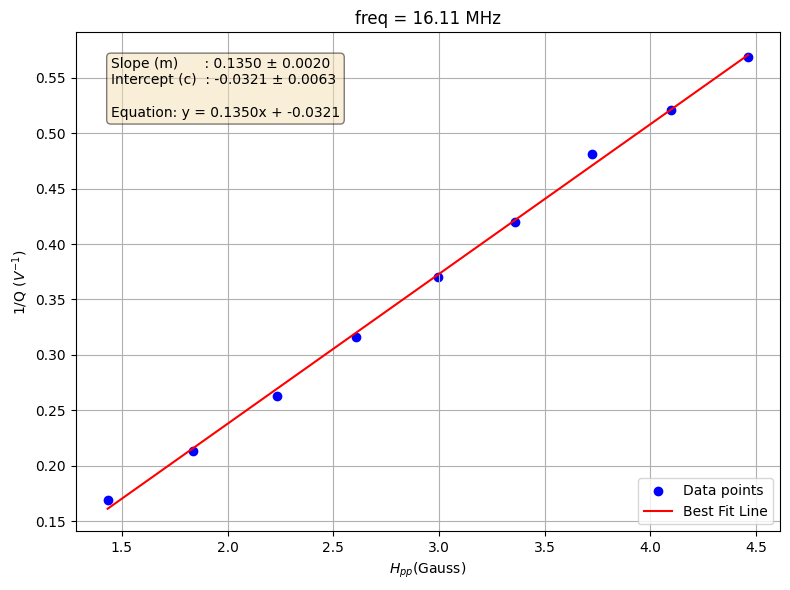

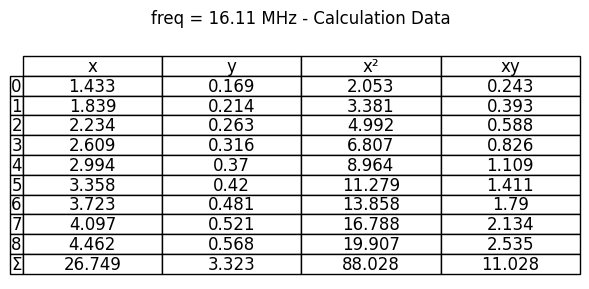

{'slope': np.float64(0.13502492748140613), 'intercept': np.float64(-0.032072024348302246), 'slope_error': np.float64(0.0020099182901357053), 'intercept_error': np.float64(0.0062859092331912884), 'table':            x         y         x²         xy
0   1.432768  0.169492   2.052824   0.242842
1   1.838704  0.213675   3.380832   0.392885
2   2.234231  0.263158   4.991789   0.587956
3   2.608941  0.316456   6.806574   0.825614
4   2.994060  0.370370   8.964394   1.108911
5   3.358361  0.420168  11.278590   1.411076
6   3.722663  0.480769  13.858217   1.789742
7   4.097373  0.520833  16.788463   2.134048
8   4.461674  0.568182  19.906536   2.535042
Σ  26.748775  3.323103  88.028219  11.028117}
2.2697002075770705


In [ ]:
P=14.6
h = 6.625 * 10**-27
Mu_b = 0.927*10**-20
# freq = 13.91 MHz
Hpp1=[1.443176656,1.849112517,2.244639766,2.629758404,3.014877041,3.379178454,3.743479868,4.107781282,4.472082695]
Qinv1=[0.192307692,0.25,0.316455696,0.378787879,0.438596491,0.5,0.531914894,0.609756098,0.657894737]
# least_squares_analysis(Hpp1,Qinv1,title='freq = 13.91 MHz',xlab=r'$H_{pp}$(Gauss)',ylab=r'1/Q ($V^{-1}$)')
# print((h*13.91*P/Mu_b)*0.1543595525952873*10**5) #=2.2403694676556434

#freq = 15MHz
Hpp2=[1.453585268,1.849112517,2.255048378,2.629758404,3.014877041,3.399995678,3.774705704,4.139007117,4.503308531]
Qinv2=[0.178571429,0.227272727,0.284090909,0.337837838,0.396825397,0.446428571,0.510204082,0.555555556,0.602409639]
# print(least_squares_analysis(Hpp2,Qinv2,title='freq = 15 MHz',xlab=r'$H_{pp}$(Gauss)',ylab=r'1/Q ($V^{-1}$)'))
# print((h*15*P/Mu_b)*0.14165980860607588*10**5) # = 2.2171593830781053

#freq = 16.11MHz
Hpp3=[1.432768044,1.838703905,2.234231154,2.60894118,2.994059817,3.358361231,3.722662645,4.09737267,4.461674084]
Qinv3=[0.169491525,0.213675214,0.263157895,0.316455696,0.37037037,0.420168067,0.480769231,0.520833333,0.568181818]
# print(least_squares_analysis(Hpp3,Qinv3,title='freq = 16.11 MHz',xlab=r'$H_{pp}$(Gauss)',ylab=r'1/Q ($V^{-1}$)'))
print((h*16.11*P/Mu_b)*0.13502492748140613*10**5) # = 2.2697002075770705



In [19]:
#MSR
B=[0.39,0.30,0.25,0.24,0.21,0.19,0.17,0.15,0.11,0.09,0.08]
sqrt_B=[np.sqrt(i) for i in B]
freq=[4.218,3.567,3.32,3.174,2.919,2.727,2.536,2.442,2.094,1.864,1.703]
# print(least_squares_analysis(freq,sqrt_B,xlab=r'$\sqrt{B_{PM}}$',ylab='Resonant frequency(Hz)'))
print(0.13814769282020412**2/(2*np.pi))

0.003037437875616676
